# Demystifying Neural Networks 
### Let's write a (tiny but working) Neural Network library from scratch!

---

## Michal Grochmal <mike@grochmal.org>

### What do I do?

+ Teach Machine Learning at **City, University of London**
+ Do data munging - currently **looking** for extra employment

## PyCon UK 2019



<div style="text-align:right;font-size:0.7em;">crown-scaled.svg</div>

## Introduction

We will attempt to understand how neural networks (ANNs) work but we will attempt to understand
more than just their concepts - we will try to understand how they are implemented in code.
Most ANN libraries use vectorial computing to achieve reasonable training speed,
after all ANNs are particularly expensive to train.

ANN libraries speed things even more by using GPUs.
We cannot delve in a single talk into ANNs and into GPUs, that would be too much to cover.
That said, the majority of what the GPU provides is an vector/array data structure,
processing of which can be performed completely on the GPU side.
We will assume that the `numpy.array` structure may or may not exist inside a GPU
and use that simple array structure as if it was GPU accelerated.
In other words, we will use `numpy.array` instead of fancy GPU vector structures
yet and GPU structures will have a very similar API to `numpy.array`.
The changes to a GPU structure needed to build an ANN library are pretty much
the same changes that we will perform on top of `numpy.array`.

## Plan

We will divide our work in two parts,
in the first part we will attempt to understand ANNs and how we can build them
using available tools.
We will go as deep as building the ANN itself but we will still use
external tools to train our ANN.

+ First we are going through the **conceptual neural network**,
  most of us do know that already but we do need to cover this.

+ We will introduce the **pulsar dataset**, which we will use to test our work.

+ Quickly build a neural network using `pytorch`.
  Based on this we will have a baseline of what we want to achieve.

+ Next we will try to figure out how the ANN actually **passes data through itself**.
  Surprisingly this is very different from the conceptual ANN.

+ (*hands-on*) Build a **tiny network** which cannot be trained but will be the base of our work.
  The network fails to understand the pulsar dataset, yet it can evaluate it.

+ Introduce **how an ANN is trained**, conceptually.

+ (*hands-on*) Download and use `autograd`.
  The `autograd` package allows us to perform differentiation, needed in order to train our ANN.

+ Understand the **differentiation chain rule** that allows `autograd`
  to derivate complex functions.

+ Use `autograd` to differentiate a single step of our tiny ANN for the pulsars.

+ (*hands-on*) Use `autograd` to fully train our tiny ANN.

**PAUSE**

In the second part we will write a small version of `autograd` ourselves,
just about enough to train our ANN.
We need to first understand what `autograd` does before being capable
of writing an ANN training library.

+ We will understand how the chain rule can be simplified by a **graph**.

+ (*hands-on*) Instead of using `autograd`'s `numpy` we will write our own `numpy` wrapper.
  The wrapper will build a graph out of every operation performed using our `numpy`.

+ (*hands-on*) Build a **graphviz** representation of our graphs,
  which will serve us to understand how we will apply the chain rule.

+ Understand the **Jacobian vector product** (JVP),
  which can be used on every graph path to evaluate the full chain rule.

+ (*hands-on*) Add JVP's to each node of our `numpy` wrapper.
  Also, we will add a procedure which will walk our **graph backwards**
  calculating the JVP along the way.

+ Next we compare our tiny implementation to the `autograd` package.

+ (*hands-on*) We use our own `grad` implementation to train the tiny
  ANN we have previously built.

+ (*hands-on*) Finally we add some **syntactic sugar** to make our ANN library
  look similar to the layer classes in `pytorch`.



<div style="text-align:right;font-size:0.7em;">preparation.svg</div>



<div style="text-align:right;font-size:0.7em;">autograd.svg</div>



<div style="text-align:right;font-size:0.7em;">perceptron.svg</div>



<div style="text-align:right;font-size:0.7em;">ann.svg</div>

Equations:

$$
\text{input} = \left[ \matrix{1 \\ 2} \right]
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('myxkcd')

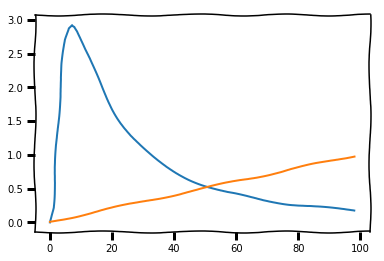

In [18]:
norm = np.arange(1, 100)/100
plt.plot((np.mean(norm)/np.sqrt(np.pi*2*norm**3))*np.exp(-(norm-np.mean(norm))**2/(2*norm)))
plt.plot(norm)



<div style="text-align:right;font-size:0.7em;">scratch.svg</div>

## References

- [Pulsar Dataset - UCI][1]
- [Autograd - HIPS][2]
- [pyTorch - Neural Network Tutorial][3]
- [Anaconda - Python Distribution][4]
- [Deep Learning - ANN Book][5]
- [Code Repository for this Talk - with some extras][6]
- [City ML Short Course - shameless marketing][7]

[1]: https://archive.ics.uci.edu/ml/datasets/HTRU2
[2]: https://github.com/HIPS/autograd
[3]: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
[4]: https://www.anaconda.com/distribution/
[5]: https://www.deeplearningbook.org/
[6]: https://github.com/grochmal/nnag
[7]: https://www.city.ac.uk/courses/short-courses/introduction-to-data-analysis-and-machine-learning-with-python